### ***DIABETES PREDICTION***

In [ ]:
!pip install lazypredict
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### ***EXPLORING DATASET***

In [ ]:
data = pd.read_csv("/content/PROJECT 3 DATASET.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


### ***MANAGING OUTLIERS***

In [ ]:
mean_skin_thickness = data[data["SkinThickness"] > 0]["SkinThickness"].mean()
data.loc[data["SkinThickness"] == 0, "SkinThickness"] = mean_skin_thickness
mean_blood_pressure = data[data["BloodPressure"] > 0]["BloodPressure"].mean()
data.loc[data["BloodPressure"] == 0, "BloodPressure"] = mean_blood_pressure
mean_insulin = data[data["Insulin"] > 0]["Insulin"].mean()
data.loc[data["Insulin"] == 0, "Insulin"] = mean_insulin
mean_bmi = data[data["BMI"] > 0]["BMI"].mean()
data.loc[data["BMI"] == 0, "BMI"] = mean_bmi

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers_mask = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data = data[~outliers_mask]


### ***PAIR PLOT***

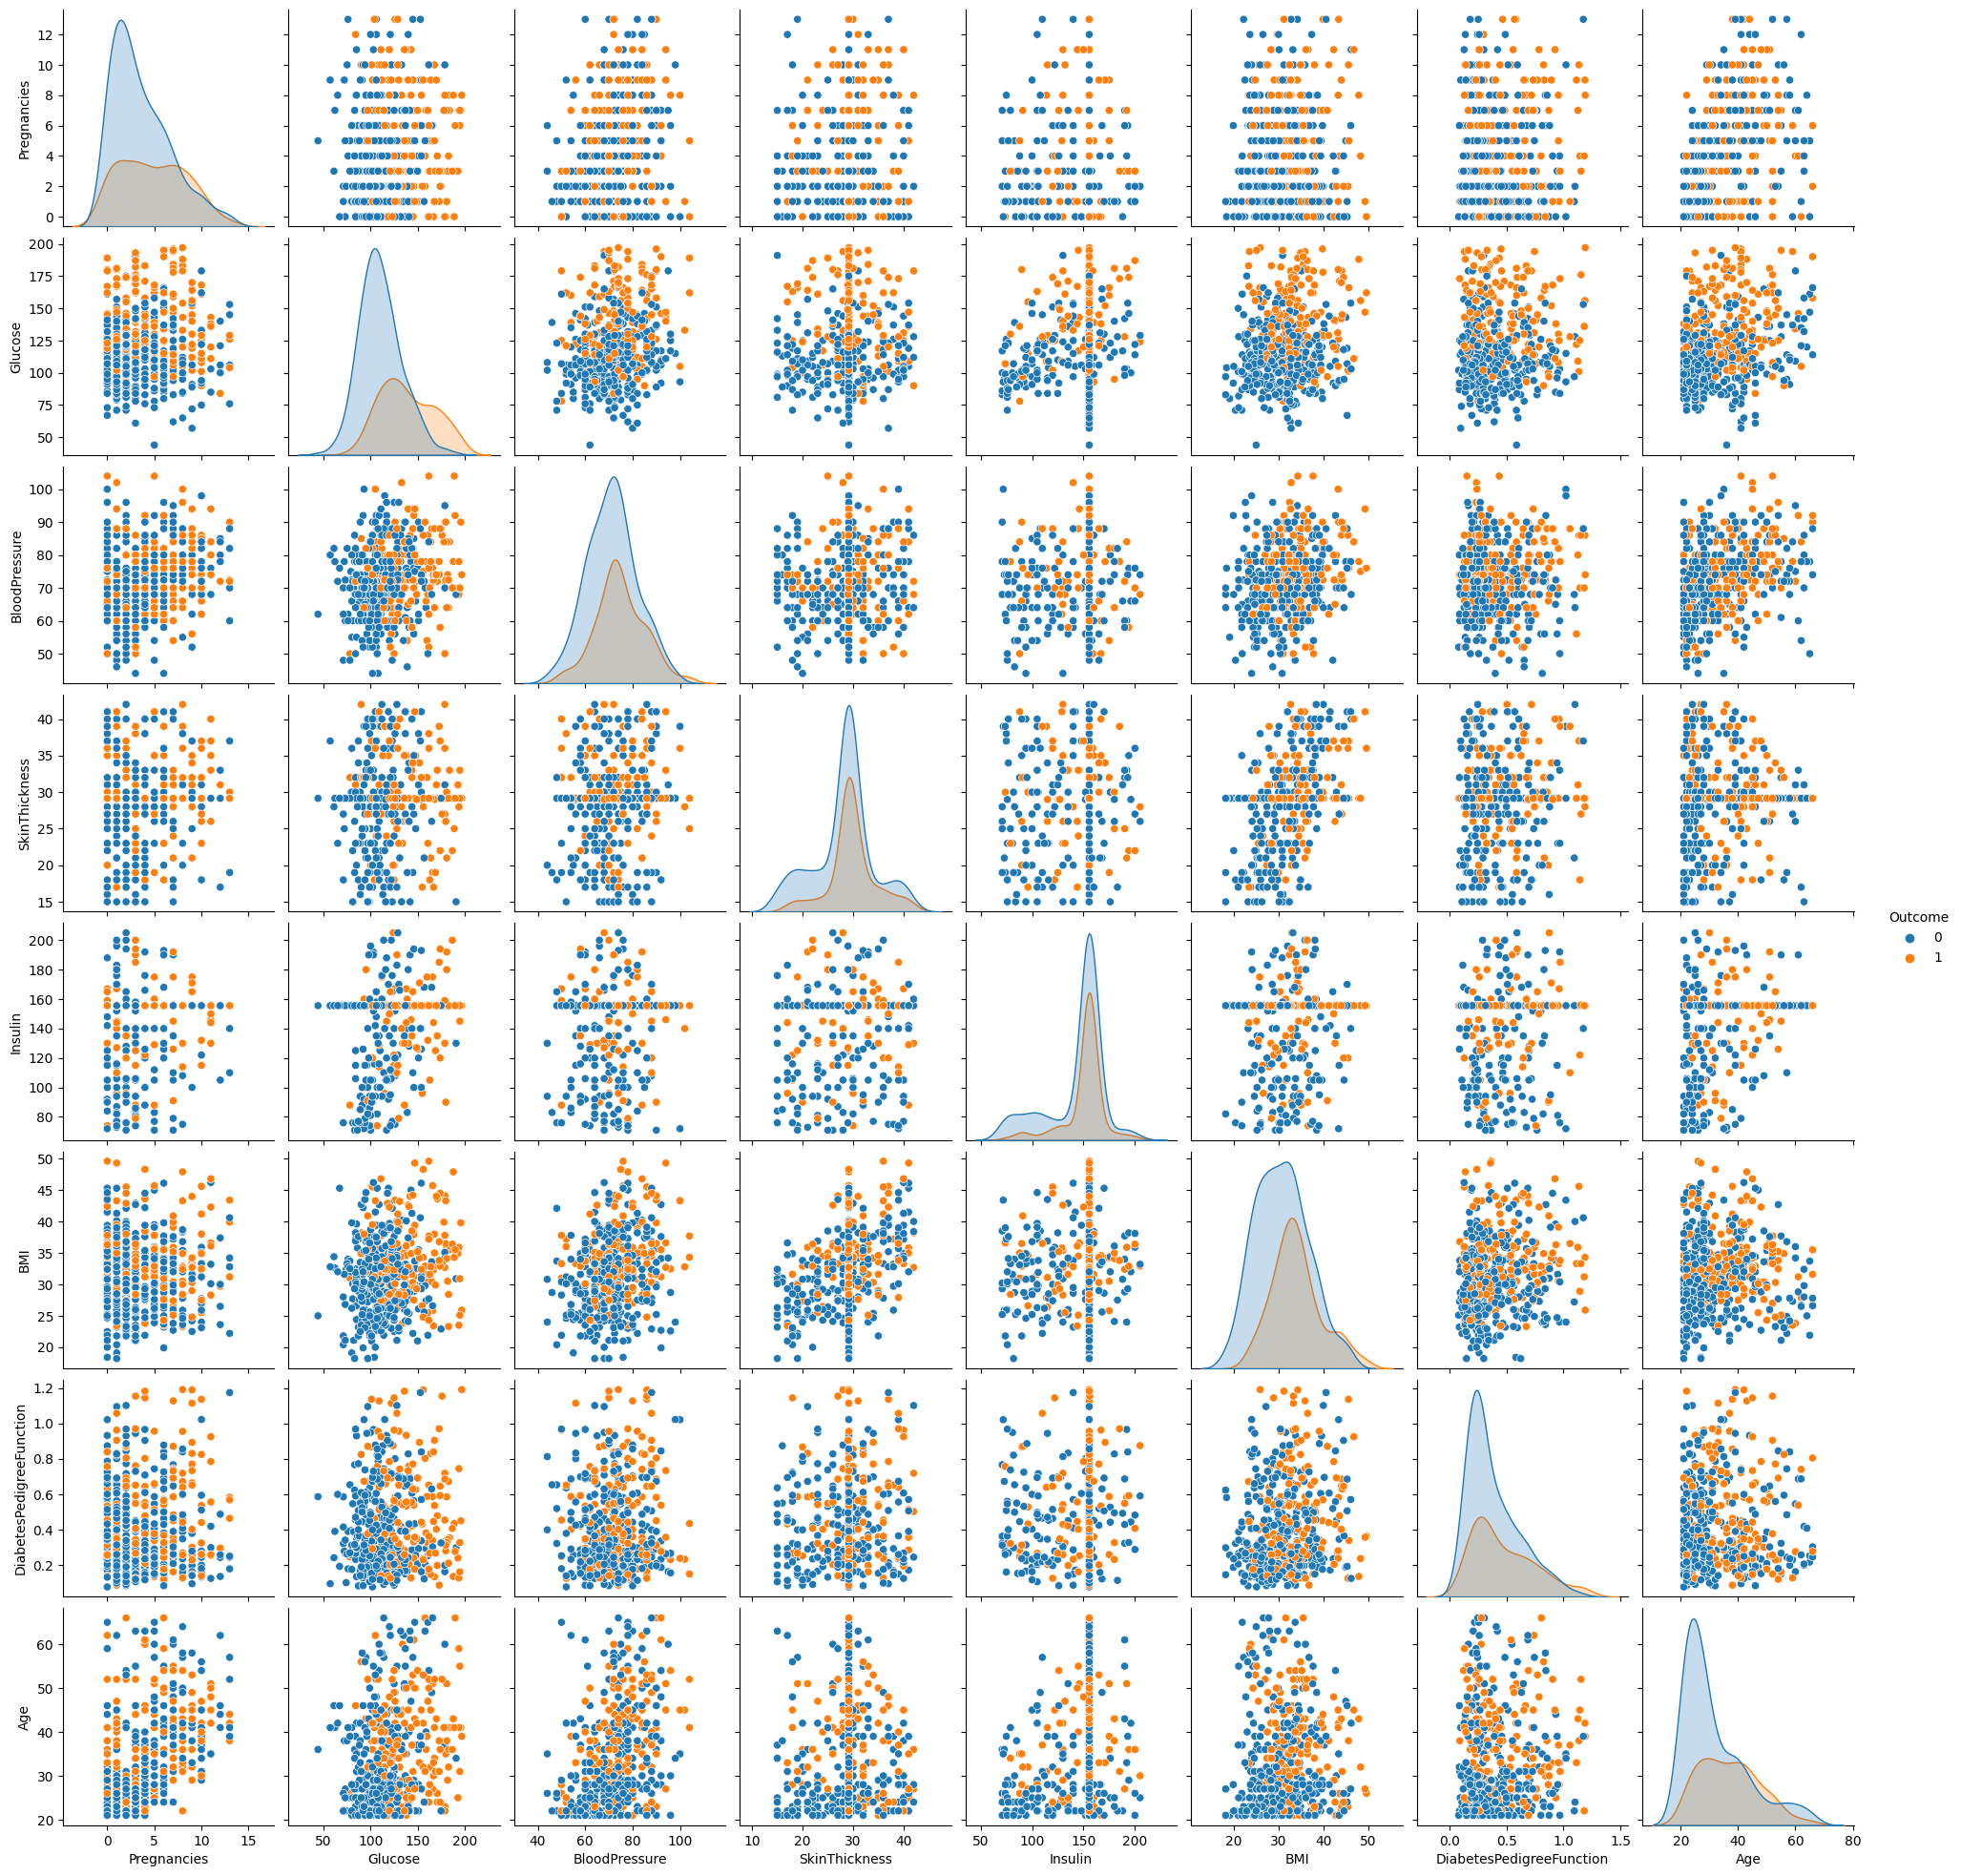

In [ ]:
sns.pairplot(data,hue = 'Outcome')

### ***CORRELATION***

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.11,0.20,0.13,0.12,0.02,0.01,0.51,0.18
Glucose,0.11,1.00,0.22,0.07,0.18,0.15,0.07,0.27,0.48
BloodPressure,0.20,0.22,1.00,0.13,0.11,0.23,0.02,0.35,0.16
SkinThickness,0.13,0.07,0.13,1.00,0.13,0.41,0.04,0.07,0.15
Insulin,0.12,0.18,0.11,0.13,1.00,0.03,-0.03,0.20,0.14
BMI,0.02,0.15,0.23,0.41,0.03,1.00,0.14,0.01,0.26
DiabetesPedigreeFunction,0.01,0.07,0.02,0.04,-0.03,0.14,1.00,0.02,0.18
Age,0.51,0.27,0.35,0.07,0.20,0.01,0.02,1.00,0.22
Outcome,0.18,0.48,0.16,0.15,0.14,0.26,0.18,0.22,1.00


import numpy as np
from google.colab import autoviz
df_7753405203963192756 = autoviz.get_df('df_7753405203963192756')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7753405203963192756, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7753405203963192756 = autoviz.get_df('df_7753405203963192756')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7753405203963192756, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7753405203963192756 = autoviz.get_df('df_7753405203963192756')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7753405203963192756, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7753405203963192756 = autoviz.get_df('df_7753405203963192756')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7753405203963192756, *['SkinThickness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7753405203963192756 = autoviz.get_df('df_7753405203963192756')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7753405203963192756, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7753405203963192756 = autoviz.get_df('df_7753405203963192756')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7753405203963192756, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7753405203963192756 = autoviz.get_df('df_7753405203963192756')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7753405203963192756, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7753405203963192756 = autoviz.get_df('df_7753405203963192756')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7753405203963192756, *['SkinThickness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7753405203963192756 = autoviz.get_df('df_7753405203963192756')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7753405203963192756, *[[['Pregnancies', 'Glucose'], ['Glucose', 'BloodPressure'], ['BloodPressure', 'SkinThickness'], ['SkinThickness', 'Insulin']]], **{})
chart

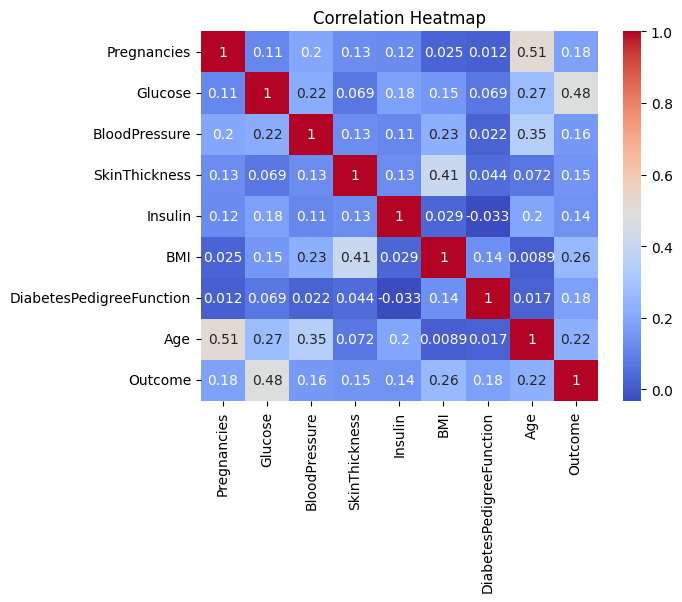

In [ ]:
corr_data = data.corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

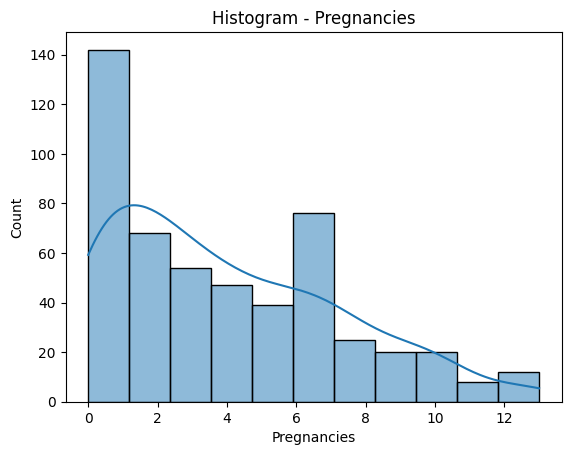

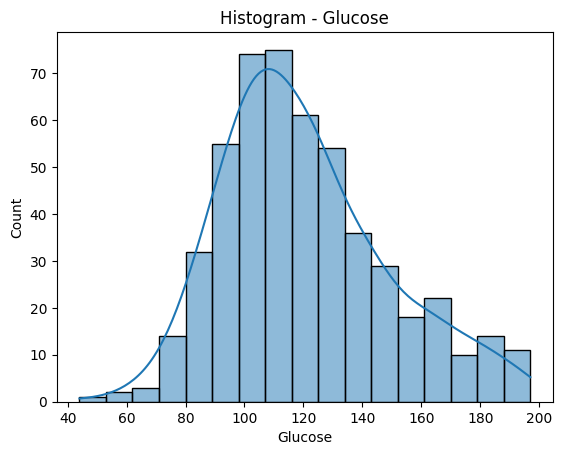

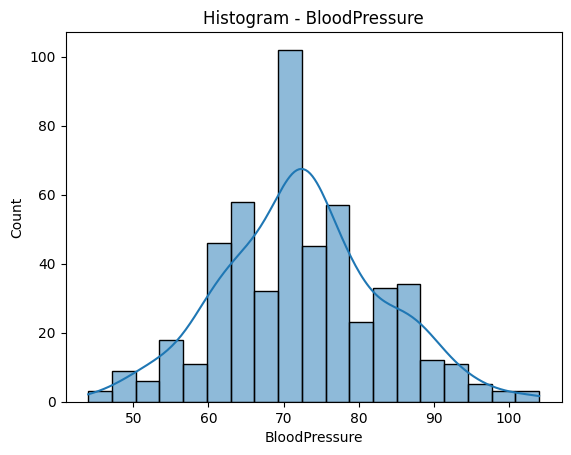

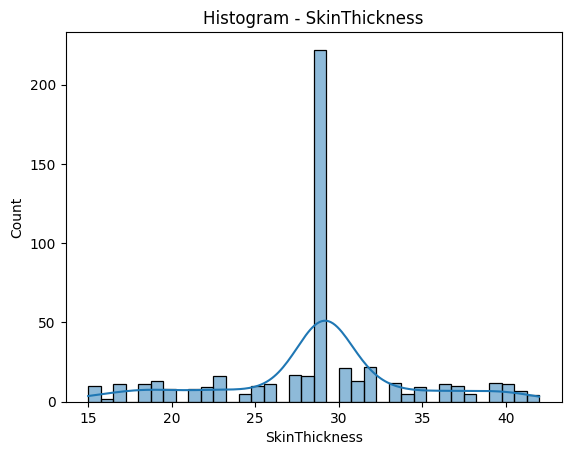

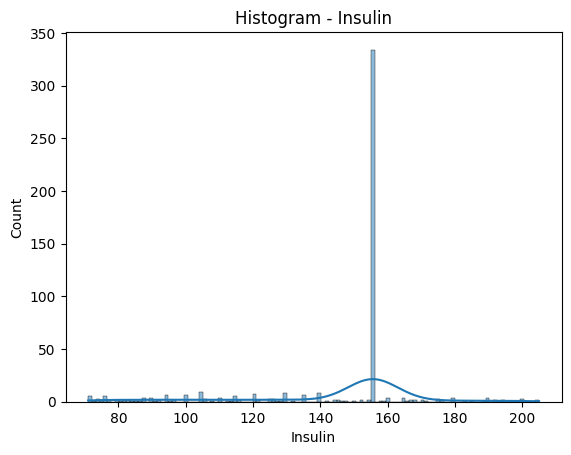

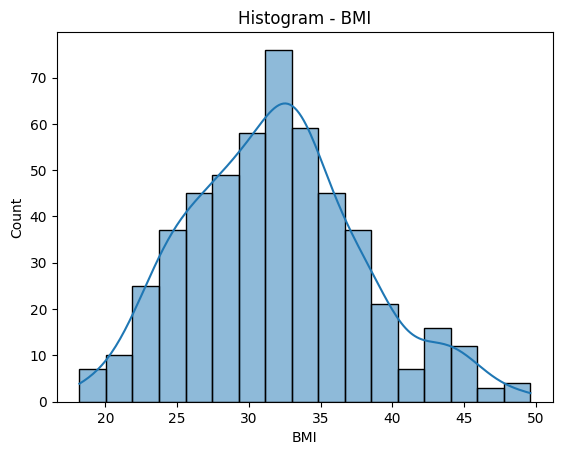

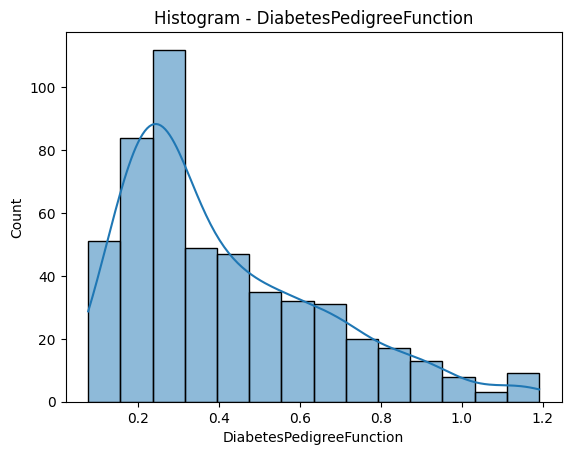

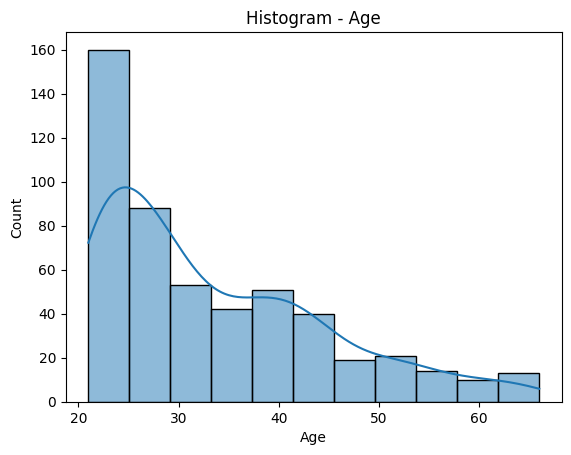

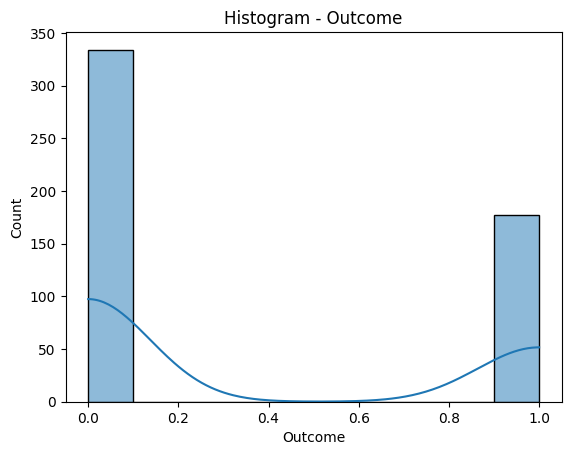

In [ ]:
l = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for i in l:
    sns.histplot(data[i], kde=True)
    plt.title('Histogram - ' + i)
    plt.show()

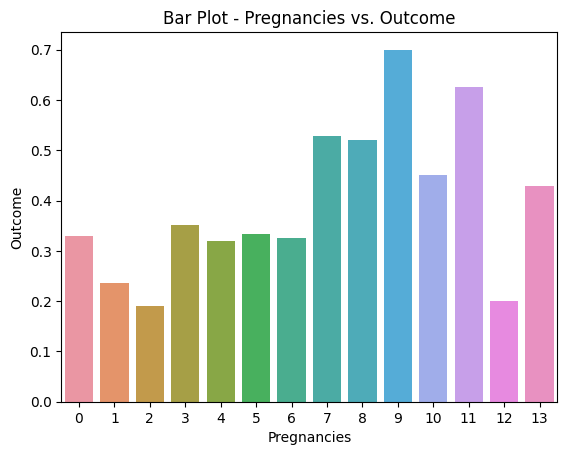

In [ ]:
sns.barplot(x='Pregnancies', y='Outcome', data=data, ci=None)
plt.title('Bar Plot - Pregnancies vs. Outcome')
plt.show()

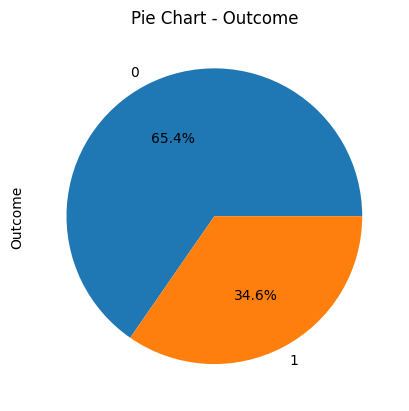

In [ ]:
data['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart - Outcome')
plt.show()

### ***SPLITTING TESTING AND TRAINING DATA***

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### ***CHOOSING THE BEST MODEL***

In [ ]:
clf  = LazyClassifier(verbose = 0 , ignore_warnings = True , custom_metric = None)
models , predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:01<00:00, 21.94it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.87               0.84     0.84      0.86   
ExtraTreesClassifier               0.87               0.84     0.84      0.86   
QuadraticDiscriminantAnalysis      0.85               0.84     0.84      0.85   
LogisticRegression                 0.85               0.83     0.83      0.85   
LinearDiscriminantAnalysis         0.85               0.83     0.83      0.85   
LinearSVC                          0.85               0.83     0.83      0.85   
RidgeClassifier                    0.85               0.83     0.83      0.85   
RidgeClassifierCV                  0.85               0.83     0.83      0.85   
CalibratedClassifierCV             0.85               0.83     0.83      0.85   
SVC                                0.83               0.82     0.82      0.83   
NearestCentroid             

### ***TOP 3 MODELS***

In [ ]:
sorted_models = models.sort_values(by='Accuracy', ascending=False)
print(sorted_models.head(3).iloc[:,:1])

                               Accuracy
Model                                  
RandomForestClassifier             0.87
ExtraTreesClassifier               0.87
QuadraticDiscriminantAnalysis      0.85


### ***RANDOM FOREST MODEL***

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy: %.2f"%(accuracy))
print("Classification Report:\n", report)


Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        34
           1       0.72      0.72      0.72        18

    accuracy                           0.81        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.81      0.81      0.81        52



### ***GETTING INPUT***

In [ ]:
pregnancies = int(input("Number of pregnancies: "))
glucose = float(input("Glucose level: "))
blood_pressure = float(input("Blood pressure: "))
skin_thickness = float(input("Skin thickness: "))
insulin = float(input("Insulin level: "))
bmi = float(input("BMI: "))
dpf = float(input("Diabetes pedigree function: "))
age = int(input("Age: "))
input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]])



Number of pregnancies: 1
Glucose level: 89
Blood pressure: 76
Skin thickness: 34
Insulin level: 37
BMI: 31
Diabetes pedigree function: 0.192
Age: 23


### ***PREDICTION***

In [ ]:
prediction = rf_classifier.predict(input_data)
if prediction[0] == 1:
    print("The model predicts that the person has diabetes.")
else:
    print("The model predicts that the person does not have diabetes.")

The model predicts that the person does not have diabetes.
